In [1]:
from randmac import RandMac

BSSID = []
def Generate_BSSID(n):
    example_mac = "00:00:00:00:00:00"
    for i in range(n):
        generated_bssid = RandMac(example_mac)
        BSSID.append(generated_bssid)
    return BSSID

In [2]:
n = 10 # number of corridors
id = Generate_BSSID(10)
print (id)

['a6:0b:ac:3d:16:f0', 'aa:b7:ca:05:e4:f1', '02:13:65:b2:15:b9', '56:f1:b4:87:0b:2a', '2e:f7:6b:c4:8d:d9', '26:ae:05:f2:08:c7', '56:a1:2d:d3:ae:1d', '62:dc:7b:d6:cb:49', '12:41:71:4e:22:14', '2e:fe:44:1f:3f:7a']


In [3]:
# Corridors with IDS
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(n)
for i in range(n):
    nx_graph.nodes[i]['title'] = str(id[i])
nt = Network('500px', '500px')
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show('graph.html')

In [4]:
# now customer visit 
import numpy as np
import matplotlib.pyplot as plt

def Randwalk(n):
    x = 2
    y = 3
    time = [x]
    position = [y] 
    for i in range (1,n+1):
        move = np.random.uniform(1,5)
        print(move)
 
        if move < 3:    
            x += 1
            y += 1  
 
        if move > 3:    
            x += 1
            y += -1
  
        time.append(x)
        position.append(y)
 
    return [time, position]

In [7]:
walk = Randwalk(3)
print (walk)

4.822347197416824
1.9799786013296519
2.2844032779580306
[[2, 3, 4, 5], [3, 2, 3, 4]]


In [8]:
path = walk[1]
for i in path:
    nx_graph.nodes[i]['color'] = 'red'
    print (str(id[i]))
nt = Network('500px', '500px')
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show('graph.html')

56:f1:b4:87:0b:2a
02:13:65:b2:15:b9
56:f1:b4:87:0b:2a
2e:f7:6b:c4:8d:d9


In [23]:
# send the data to the detection Node
for i in range(len(BSSID)): 
    value = BSSID[i] 
    test_result= random.sample(range(1, 10), 1)
    test_time= datetime.now().isoformat()
    data= {'peripherial_id': str(value), 'status': 'active', 'test_time':test_time ,'test_result': str(test_result)} 
    new_dict= {'m2m:cin': {'cnf': 'application/json:0', 'con': data}}
    payload = json.dumps(new_dict)
    API_endpoint= "http://127.0.0.1:5000/DetectionService"
    headers= { 'content-Type':  'application/json'}
    print (payload)
    time.sleep(6)

In [25]:
# request from the server for the data and filtering the data with BSSIDs

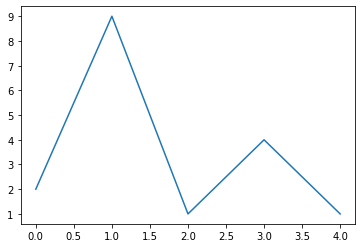

[2, 9, 1, 4, 1]


In [7]:
# random walk

from random import seed
from random import randrange 
from matplotlib import pyplot

seed(1)
series_walk = [randrange(n) for i in range(5)]
pyplot.plot(series_walk)
pyplot.show()
print(series_walk)

In [9]:

# api-endpoint
URL = "http://138.96.16.37:443/ControlService/location"

PARAMS = {'location':'ev74dvrddm74'}

r = requests.get(url = URL, params = PARAMS)

# extracting data in json format
data = r.json()
print(data)


{"location_data": {"_id": {"$oid": "613a6e05bb982cbcebf708b4"}, "DetectionNodeData": {"peripherial_id": "4A:54:4C:23:67:B6", "status": "active", "test_result": "5", "test_time": "2021-09-09T22:26:42.131090"}, "Disinfection": true, "Disinfection_Time": "2021-09-09T22:26:45.098924", "Location-Service-Info": "https://NationalHealth.com/forecast", "location": "ev74dvrddm74"}}
